## Do it! 딥러닝 입문의 파이썬 코드에 기반한 딥러닝 기초 과정

### 경사하강법을 이용한 회귀분석 (learning rate=1)

In [ ]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [ ]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [ ]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [ ]:
diabetes.target[:3]

array([151.,  75., 141.])

In [ ]:
x=diabetes.data[:,2]
y=diabetes.target

In [ ]:
w=1
b=1
for i in range(1, 100):
  for x_i, y_i in zip(x,y):
    y_hat=x_i*w +b
    err=y_i-y_hat
    w_rate=x_i
    w=w+w_rate*err
    b=b+1*err
print(w,b)

913.5973364345905 123.39414383177204


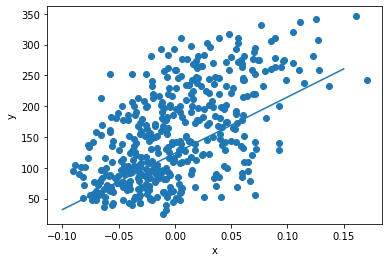

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
pt1=(-0.1,-0.1*w+b)
pt2=(0.15, 0.15*w+b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
x_new=0.18
y_pred=x_new*w+b
print(y_pred)

287.8416643899983


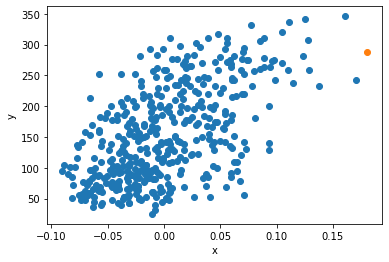

In [ ]:
plt.scatter(x,y)
plt.scatter(x_new, y_pred)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Neuron이라는 이름의 파이썬 클래스 만들어 forward와 backpropagation의 원리로 신경망 구조 이해하기

In [ ]:
class Neuron:

  def __init__(self): #__init__()에 필요한 변수 선언
      self.w=1.0 # w 초기화
      self.b=1.0 # b 초기화

  def forward(self, x): 
      y_hat=x*self.w+self.b  # 직선의 방정식 계산 
      return y_hat

  def backprop(self, x, err): 
    w_grad=x*err #gradient of w 
    b_grad=1*err #gradient of b 
    return w_grad, b_grad

  def fit(self, x, y, epochs=100): 
    for i in range(epochs):      #에포크만큼 반복 
        for x_i, y_i in zip(x,y):  #모든 샘플에 대해 반복
            y_hat=self.forward(x_i)  #정방향 계산
            err=-(y_i-y_hat)
            w_grad, b_grad=self.backprop(x_i, err) #역방향 계산
            self.w -=w_grad # w 업데이트
            self.b -=b_grad # b 업데이트

In [ ]:
neuron=Neuron()
neuron.fit(x,y)

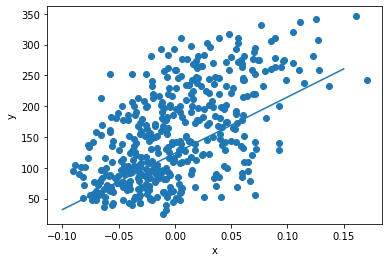

In [ ]:
plt.scatter(x,y)
pt1=(-0.1, -0.1*neuron.w+neuron.b)
pt2=(0.15, 0.15*neuron.w+neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 이진 분류를 위한 로지스틱 회귀

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [ ]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

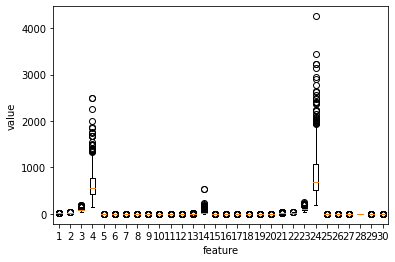

In [ ]:
plt.boxplot(cancer.data)
plt.xlabel("feature")
plt.ylabel("value")
plt.show()

In [ ]:
cancer.feature_names[[3,13,23]] #boxplot에서 특이한 분포를 보이는 특성 확인해보니 모두 넓이와 관련된 것들

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [ ]:
import numpy as np
np.unique(cancer.target, return_counts=True) # 타겟에는 0:음성, 1: 양성 데이터가 각각 212개와 357개 들어 있음.

(array([0, 1]), array([212, 357]))

In [ ]:
x=cancer.data
y=cancer.target

#### train set 과 test set 을 나누기

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, stratify=y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [ ]:
np.unique(y_train, return_counts=True) # 전체 훈련데이터의 음성/양성 비율과 train set내의 음성/양성 비율이 비슷한지 확인

(array([0, 1]), array([170, 285]))

In [ ]:
class logisticNeuron:

  def __int__(self):
    self.w=None
    self.b=None

  def forward(self,x):
    z=np.sum(x*self.w)+self.b
    return z
  
  def backprop(self, x, err):
    w_grad=x*err
    b_grad=1*err
    return w_grad, b_grad

  def activation(self,z):
    a=1/(1 + np.exp(-z))
    return a

  def fit(self, x,y, epochs=100):
    self.w=np.ones(x.shape[1])
    self.b=0
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        z=self.forward(x_i)
        a=self.activation(z)
        err=-(y_i - a)
        w_grad, b_grad=self.backprop(x_i, err)
        self.w -=w_grad
        self.b -=b_grad

  def predict(self, x):
     z=[self.forward(x_i) for x_i in x]
     a=self.activation(np.array(z))
     return a>0.5


In [ ]:
neuron=logisticNeuron()
neuron.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


In [ ]:
np.mean(neuron.predict(x_test)==y_test) #Accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


0.8245614035087719

#### 손실함수의 결과를 조정하며 저장하는 기능을 가진 단일층 신경망 구현

In [ ]:
class Single_layer:

  def __init__(self):
    self.w=None
    self.b=None
    self.losses=[] # 손실함수값을 살펴보기 위해

  def forward(self,x):
    z=np.sum(x*self.w)+self.b
    return z
  
  def backprop(self, x, err):
    w_grad=x*err
    b_grad=1*err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)),x] # 행렬의 맨 앞에 1로 채워진 열벡터를 추가

  def activation(self,z):
    a=1/(1 + np.exp(-z))
    return a

  def fit(self, x,y, epochs=100):
    self.w=np.ones(x.shape[1])
    self.b=0
    for i in range(epochs):
      loss=0
      indexes=np.random.permutation(np.arange(len(x)))#에포크에 사용한 샘플의 순서를 섞기 위해 
      for i in indexes:
        z=self.forward(x[i])
        a=self.activation(z)
        err=-(y[i] - a)
        w_grad, b_grad=self.backprop(x[i], err)
        self.w -=w_grad
        self.b -=b_grad
        a=np.clip(a, 1e-10, 1-1e-10) # 로그 계산시 오류가 없도록 클리핑한 후 손실 누적하기 위해
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a)) #에포크마다 평균 손실을 저장
      self.losses.append(loss/len(y))

  def predict(self, x):
     z=[self.forward(x_i) for x_i in x]
     return np.array(z)>0 #step 함수 적용

  def score(self, x,y):
    return np.mean(self.predict(x)==y)

In [ ]:
layer=Single_layer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


0.9035087719298246

##### 정확도가 0.9로 좋아진 이유는 에포크마다 train set을 무작위로 섞어 손실 함수의 값을 줄였기 때문임. train set 자체를 섞는 방법도 있지만 이 방법이 더 효율적이고 빠른 방법임. 확인을 위해 아래의 그래프를 보자.

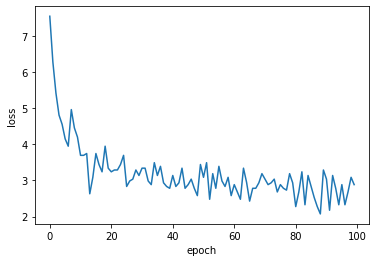

In [ ]:
plt.plot(layer.losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

### 모델을 안정적으로 훈련하기 위한 기법들

- 훈련, 검증, 테스트 세트 준비

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
x=cancer.data
y=cancer.target
x_train_all, x_test, y_train_all, y_test=train_test_split(x,y, stratify=y, test_size=0.2, random_state=42)


- 검증 세트 분할하기 
- 전체 데이터를 훈련:테스트로 8:2로 분할한 후 다시 훈련 세트를 훈련:검증으로 8:2로 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
print(len(x_train), len(x_val))

364 91


- 스케일 조정이 필요한지 체크

['mean perimeter' 'mean area']


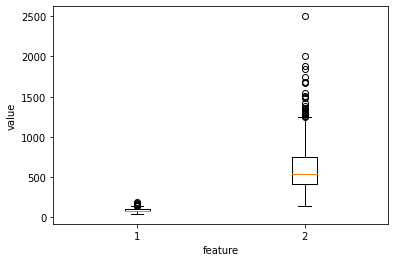

In [ ]:
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel("feature")
plt.ylabel("value")
plt.show()

- 가중치 기록하고 업데이트 양을 learning_rate로 조절

In [ ]:
class Single_layer1:

  def __init__(self, learning_rate=0.1): 
    self.w=None
    self.b=None
    self.losses=[]
    self.w_history=[]
    self.lr=learning_rate

  def forward(self,x):
    z=np.sum(x*self.w)+self.b
    return z
  
  def backprop(self, x, err):
    w_grad=x*err
    b_grad=1*err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)),x] # 행렬의 맨 앞에 1로 채워진 열벡터를 추가

  def activation(self,z):
    a=1/(1 + np.exp(-z))
    return a

  def fit(self,x,y, epochs=100): 
    self.w=np.ones(x.shape[1])
    self.b=0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
        loss=0
        indexes=np.random.permutation(np.arange(len(x)))
        for i in indexes:
            z=self.forward(x[i])
            a=self.activation(z)
            err=-(y[i]-a)
            w_grad, b_grad=self.backprop(x[i],err)
            self.w -=self.lr*w_grad
            self.b -=b_grad
            self.w_history.append(self.w.copy())
            a=np.clip(a, 1e-10, 1-1e-10)
            loss +=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
        self.losses.append(loss/len(y))

  def predict(self, x):
     z=[self.forward(x_i) for x_i in x]
     return np.array(z)>0 #step 함수 적용

  def score(self, x,y):
    return np.mean(self.predict(x)==y)

 

- 정확도는 91%

In [ ]:
layer1=Single_layer1()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


0.9120879120879121

- 스케일이 달랐던 두 변수에 대한 가중치가 크게 흔들리는 모습을 보임.

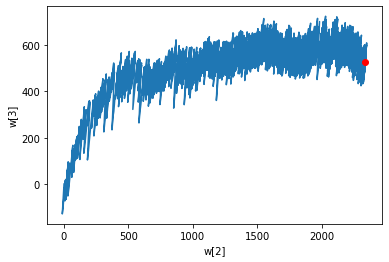

In [ ]:
w2=[]
w3=[]
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], "ro")
plt.xlabel("w[2]")
plt.ylabel("w[3]")
plt.show()

- 스케일을 조정한 후 다시 훈련해보자

In [ ]:
train_mean=np.mean(x_train, axis=0)
train_std=np.std(x_train, axis=0)
x_train_scaled=(x_train-train_mean)/train_std

- 스케일을 조정했더니 대각선 방향으로 빠르게 이동하여 최적값에 이름을 볼 수 있음

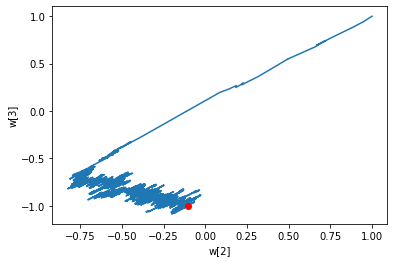

In [ ]:
layer2=Single_layer1()
layer2.fit(x_train_scaled, y_train)
w2=[]
w3=[]
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], "ro")
plt.xlabel("w[2]")
plt.ylabel("w[3]")
plt.show()

- 정확도를 구해보니 결과가 상당히 좋지 않다! 그 이유는 검증 세트에는 스케일 조정을 하지 않았기 때문임.

In [ ]:
layer2.score(x_val, y_val)

0.37362637362637363

- 검증 세트의 스케일은 훈련 세트와 같은 비율로 조정이 되어야 함. 각각 따로 조정을 하면 원본 데이터의 분포가 유지 되지 않아서 문제가 될 수 있음. 따라서 검증 세트의 표준화를 훈련세트의 평균과 분산으로 변환.

In [ ]:
x_val_scaled=(x_val-train_mean)/train_std
layer2.score(x_val_scaled, y_val)

0.967032967032967

- 과대 적합 및 과소 적합 문제

In [ ]:
class Single_layer2:

  def __init__(self, learning_rate=0.1): 
    self.w=None
    self.b=None
    self.losses=[]
    self.val_losses=[] # 검증 세트에 대한 손실도 기록
    self.w_history=[]
    self.lr=learning_rate

  def forward(self,x):
    z=np.sum(x*self.w)+self.b
    return z
  
  def backprop(self, x, err):
    w_grad=x*err
    b_grad=1*err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)),x] # 행렬의 맨 앞에 1로 채워진 열벡터를 추가

  def activation(self,z):
    a=1/(1 + np.exp(-z))
    return a

  def update_val_loss(self, x_val, y_val):
    if x_val is None:
      return
    val_loss=0
    for i in range(len(x_val)):
      z=self.forward(x_val[i])
      a=self.activation(z)
      a=np.clip(a, 1e-10, 1-1e-10)
      val_loss +=-(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val))

  def fit(self,x,y, epochs=100, x_val=None, y_val=None): 
    self.w=np.ones(x.shape[1])
    self.b=0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
        loss=0
        indexes=np.random.permutation(np.arange(len(x)))
        for i in indexes:
            z=self.forward(x[i])
            a=self.activation(z)
            err=-(y[i]-a)
            w_grad, b_grad=self.backprop(x[i],err)
            self.w -=self.lr*w_grad
            self.b -=b_grad
            self.w_history.append(self.w.copy())
            a=np.clip(a, 1e-10, 1-1e-10)
            loss +=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
        self.losses.append(loss/len(y))
        self.update_val_loss(x_val, y_val) #검증세트에 대한 손실 계산

  def predict(self, x):
     z=[self.forward(x_i) for x_i in x]
     return np.array(z)>0 #step 함수 적용

  def score(self, x,y):
    return np.mean(self.predict(x)==y)


In [ ]:
layer3=Single_layer2()
layer3.fit(x_train_scaled, y_train,x_val= x_val_scaled, y_val=y_val)

- 에포크 20번 이후로 검증 손실이 훈련 세트보다 높아지는 과대 적합 현상이 나타난다. 따라서 20번 이후의 훈련을 할 필요가 없음.

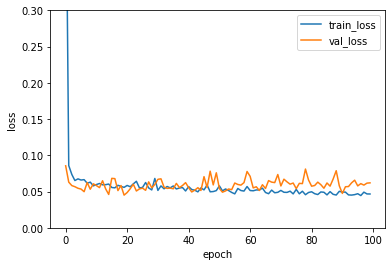

In [ ]:
plt.ylim(0,0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train_loss', "val_loss"])
plt.show()

- 20번에서 멈추도록 조기 종료를 사용함. 과대 적합 되기 전에 훈련을 종료하였으므로 97%로 정확도가 향상 됨.

In [ ]:
layer4=Single_layer2()
layer4.fit(x_train_scaled, y_train, epochs=20)
layer4.score(x_val_scaled, y_val)

0.978021978021978

- 과대적합을 해결하는 또 하나의 방법 : 가중치 규제 (regularization)
- 가중치 규제란 가중치가 커지지 않도록 제한하는 기법으로 모델의 일반화 성능이 향상 됨.
- L1, L2 규제 및 이를 혼합한 규제 방법이 있음. 